In [24]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/covid-19-vaccination/country_vaccinations.csv


# COVID - 19 Vaccination Progress across countries
In this notebook we will analyze vaccination progress across different countries.

## [Run on Kaggle](https://www.kaggle.com/miroslavsolr/covid-19-vaccination-practise)

## Our features:
* **Country** - this is the country for which the vaccination information is provided;
* **Country ISO Code** - ISO code for the country;
* **Date**- date for the data entry; for some of the dates we have only the daily vaccinations, for others, only the (cumulative) total;
* **Total number of vaccin ations** - this is the absolute number of total immunizations in the country;
* **Total number of people vaccinated** - a person, depending on the immunization scheme, will receive one or more (typically 2) vaccines; at a certain moment, the number of vaccination might be larger than the number of people;
* **Total number of people fully vaccinated** - this is the number of people that received the entire set of immunization according to the immunization scheme (typically 2); at a certain moment in time, there might be a certain number of people that received one vaccine and another number (smaller) of people that received all vaccines in the scheme;
* **Daily vaccinations (raw)** - for a certain data entry, the number of vaccination for that date/country;
* **Daily vaccinations** - for a certain data entry, the number of vaccination for that date/country;
* **Total vaccinations per hundred** - ratio (in percent) between vaccination number and total population up to the date in the country;
* **Total number of people vaccinated per hundred** - ratio (in percent) between population immunized and total population up to the date in the country;
* **Total number of people fully vaccinated per hundred** - ratio (in percent) between population fully immunized and total population up to the date in the country;
* **Number of vaccinations per day** - number of daily vaccination for that day and country;
* Daily vaccinations per million - ratio (in ppm) between vaccination number and total population for the current date in the country;
* **Vaccines used in the country** - total number of vaccines used in the country (up to date);
* **Source name** - source of the information (national authority, international organization, local organization etc.);
* **Source website** - website of the source of information;

# Import python packages

In [25]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")

# We will mainy look for:

1. What vaccination schemes are used in various countries;
1. Total number of vaccinations and percent of vaccinations;
1. Daily vaccinations and daily vaccinations per million;
1. Total people vaccinated and percent of people vaccinated;

In [26]:
#read dataframe
df = pd.read_csv('../input/covid-19-vaccination/country_vaccinations.csv')
df.head() #first 5 rows

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
1,Albania,ALB,2021-01-11,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
3,Albania,ALB,2021-01-13,188.0,188.0,NaN,60.0,63.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
4,Albania,ALB,2021-01-14,266.0,266.0,NaN,78.0,66.0,0.01,0.01,NaN,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...


In [27]:
df.info() #Lets have a quick overview of data
print('\n')
print('String data columns =',len(df.select_dtypes('object').columns.tolist()))
print('Numeric data columns =',len(df.select_dtypes('number').columns.tolist()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5321 entries, 0 to 5320
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              5321 non-null   object 
 1   iso_code                             4989 non-null   object 
 2   date                                 5321 non-null   object 
 3   total_vaccinations                   3384 non-null   float64
 4   people_vaccinated                    2990 non-null   float64
 5   people_fully_vaccinated              2039 non-null   float64
 6   daily_vaccinations_raw               2845 non-null   float64
 7   daily_vaccinations                   5137 non-null   float64
 8   total_vaccinations_per_hundred       3384 non-null   float64
 9   people_vaccinated_per_hundred        2990 non-null   float64
 10  people_fully_vaccinated_per_hundred  2039 non-null   float64
 11  daily_vaccinations_per_million

In [28]:
df.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,3.384000e+03,2.990000e+03,2.039000e+03,2.845000e+03,5.137000e+03,3384.000000,2990.000000,2039.000000,5137.000000
mean,1.973317e+06,1.643105e+06,5.917602e+05,8.109894e+04,5.777552e+04,7.933061,6.298171,2.611182,2530.467783
std,6.715711e+06,5.146488e+06,2.342962e+06,2.312530e+05,1.837794e+05,14.742256,10.306654,6.103214,4440.826537
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,3.281900e+04,3.169525e+04,1.336900e+04,2.654000e+03,1.129000e+03,0.637500,0.660000,0.275000,341.000000
50%,2.240625e+05,2.068990e+05,6.852000e+04,1.326600e+04,6.281000e+03,2.990000,2.690000,0.970000,1111.000000
75%,1.026825e+06,8.769508e+05,3.622800e+05,5.800200e+04,2.896900e+04,7.645000,6.060000,2.290000,2552.000000
max,8.791232e+07,5.735885e+07,2.977616e+07,2.904229e+06,2.158020e+06,126.290000,80.570000,45.720000,54264.000000


<AxesSubplot:>

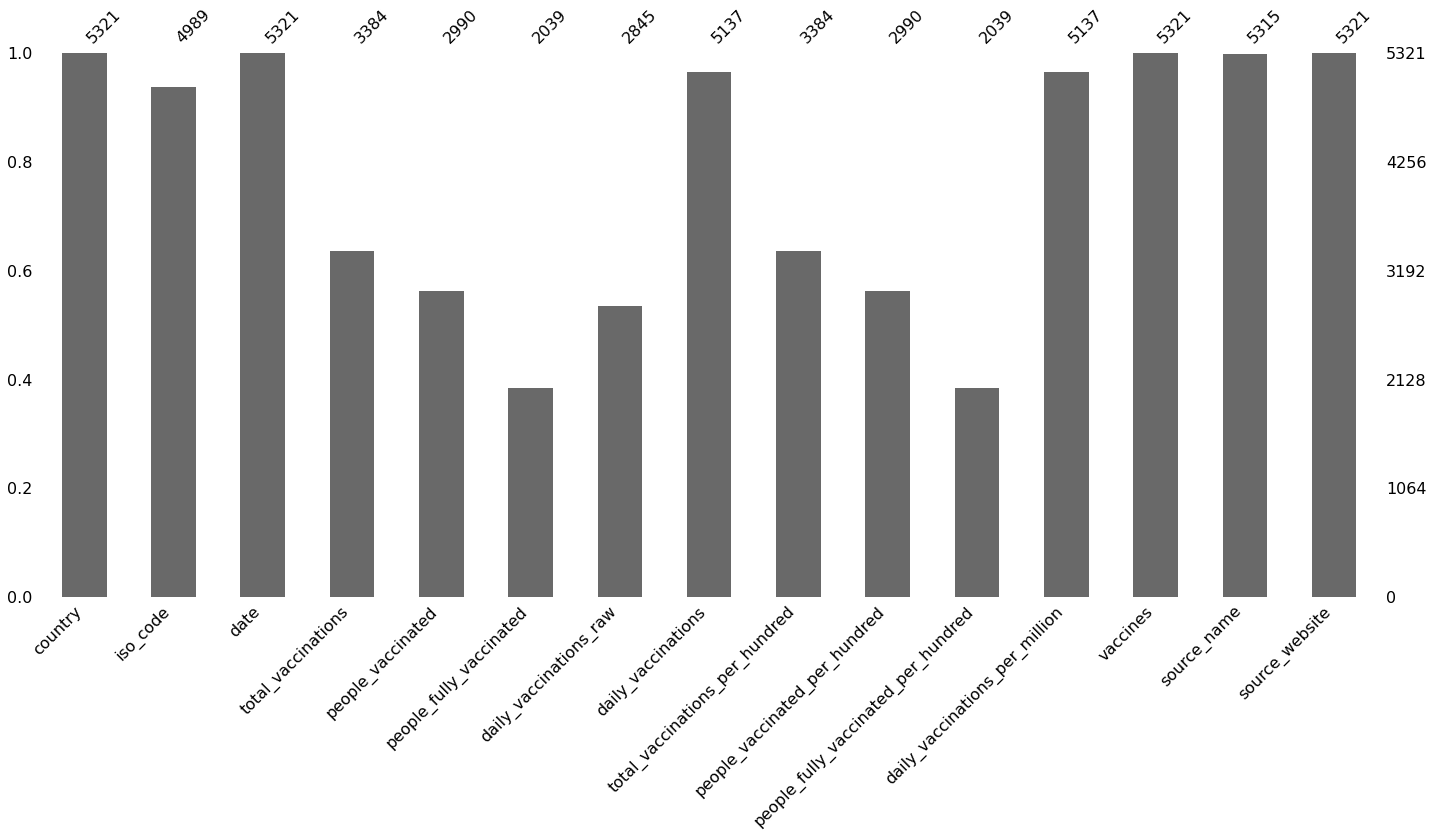

In [29]:
import missingno #quick overview of missing data
missingno.bar(df)

# Lets group our countries by vaccines, country, and ISO code

In [30]:
vaccine_country = df.groupby(['country','iso_code','vaccines'])['total_vaccinations', 
                                                                      'total_vaccinations_per_hundred',
                                                                      'daily_vaccinations',
                                                                      'daily_vaccinations_per_million',
                                                                      'people_vaccinated',
                                                                      'people_vaccinated_per_hundred',
                                                                      'people_fully_vaccinated',
                                                                      'people_fully_vaccinated_per_hundred'].agg('max').reset_index()
vaccine_country.columns = ["Country", "iso_code", "Vaccines", "Total vaccinations", "Percent", "Daily vaccinations", 
                           "Daily vaccinations per million", "People vaccinated", "People vaccinated per hundred",
                           'People fully vaccinated', 'People fully vaccinated percent']
vaccine_country



,Country,iso_code,Vaccines,Total vaccinations,Percent,Daily vaccinations,Daily vaccinations per million,People vaccinated,People vaccinated per hundred,People fully vaccinated,People fully vaccinated percent
0,Albania,ALB,Pfizer/BioNTech,15793.0,0.55,1081.0,376.0,6073.0,0.21,655.0,0.02
1,Algeria,DZA,Sputnik V,75000.0,0.17,3748.0,85.0,NaN,NaN,NaN,NaN
2,Andorra,AND,Pfizer/BioNTech,2526.0,3.27,100.0,1294.0,2526.0,3.27,NaN,NaN
3,Anguilla,AIA,Oxford/AstraZeneca,3929.0,26.19,331.0,22064.0,3929.0,26.19,NaN,NaN
4,Argentina,ARG,Sputnik V,1357596.0,3.00,64812.0,1434.0,1030504.0,2.28,327092.0,0.72
...,...,...,...,...,...,...,...,...,...,...,...
116,United Kingdom,GBR,"Oxford/AstraZeneca, Pfizer/BioNTech",22887118.0,33.71,445204.0,6558.0,21796278.0,32.11,1090840.0,1.61
117,United States,USA,"Moderna, Pfizer/BioNTech",87912323.0,26.29,2158020.0,6453.0,57358849.0,17.15,29776160.0,8.90
118,Uruguay,URY,Sinovac,70408.0,2.03,13526.0,3894.0,70408.0,2.03,NaN,NaN
119,Venezuela,VEN,Sputnik V,12194.0,0.04,1204.0,42.0,12194.0,0.04,NaN,NaN


# What vaccines are used in each country?

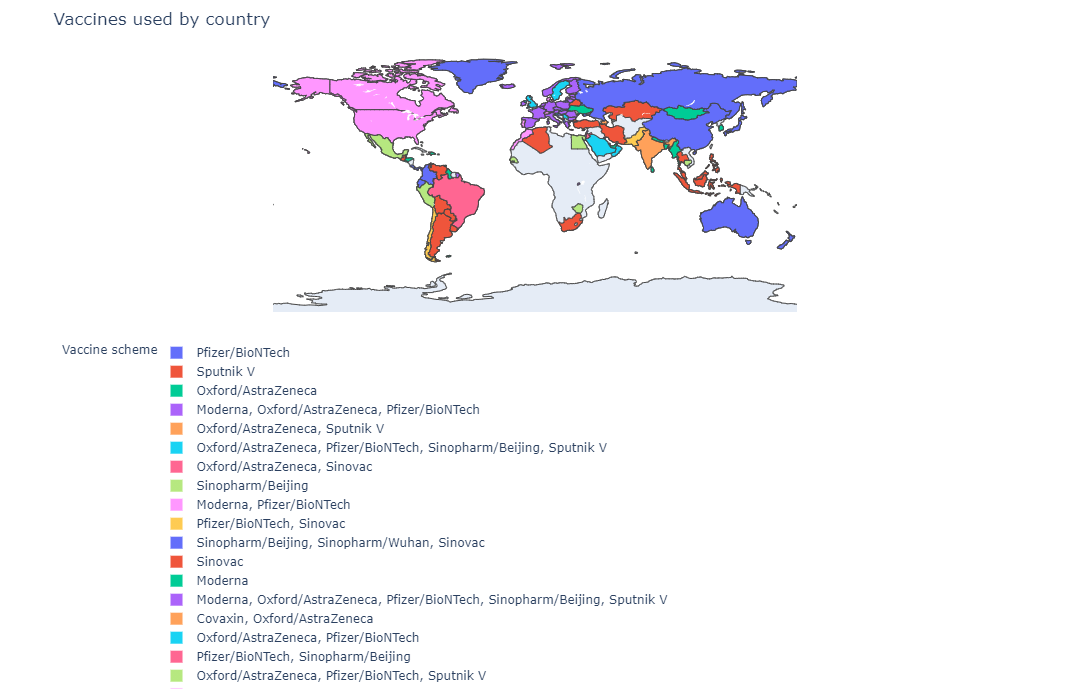

In [31]:
#Lets use plotly.express choropleth maps
#https://plotly.github.io/plotly.py-docs/generated/plotly.express.choropleth.html
fig = px.choropleth(locations = vaccine_country['Country'], 
                   locationmode='country names',
                   color = vaccine_country['Vaccines'],
                   title = 'Vaccines used by country',
                   width = 700,
                   height= 700
                   )
fig.update_layout({'legend_orientation':'h'})
fig.update_layout({'legend_title':'Vaccine scheme'},geo=dict(showframe=False))
fig.update_layout(margin=dict(l=60, r=60, t=50, b=50))
fig.show()

We can see different vaciness used by countries

# Which vaccination scheme is the most used?

In [32]:
vaccine = df.groupby(['vaccines'])[['total_vaccinations','total_vaccinations_per_hundred',
                                       'daily_vaccinations','daily_vaccinations_per_million']].agg('max').reset_index()

vaccine.columns = ["Vaccines", "Total vaccinations", "Percent", "Daily vaccinations", 
                           "Daily vaccinations per million"]
vaccine = vaccine.sort_values('Total vaccinations', ascending = False)


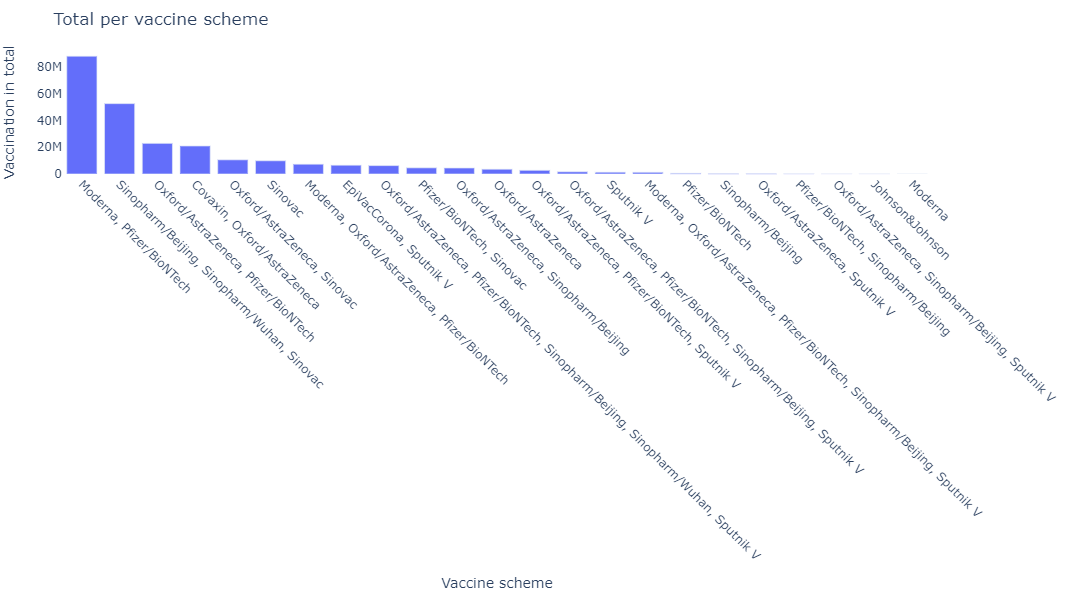

In [33]:
trace = go.Bar(x=vaccine['Vaccines'],
               y = vaccine['Total vaccinations'],
              name = 'Vaccination Scheme',
              text = vaccine['Vaccines'],
              )

data = [trace]
layout = dict(title = 'Total per vaccine scheme', xaxis = dict(tickangle=45,
                                                              showticklabels=True,
                                                              title = 'Vaccine scheme'),
             yaxis = dict(title = 'Vaccination in total'),
             plot_bgcolor='rgba(0,0,0,0)',
             height = 600,
             margin=dict(l=60, r=60, t=50, b=50)            
             )
fig = go.Figure(data = data,layout = layout
              )
iplot(fig)

# Some countries using mixed vaccination schemes (using more then one vaccine)

* Moderna, Pfizer/BioNTech - USA;
* CNBG, Sinovac - China;
* Oxford/AstraZeneca, Pfizer/BioNTech', 'Pfizer/BioNTech - UK;
* Pfizer/BioNTech - mostly EU;
* Pfizer/BioNTech, Sinopharm - UAE;
* Sinovac - Turkey;
* Covaxin, Covishield - India;
* Sputnik V, Pfizer/BioNTech, Moderna - Slovakia

# Vaccination scheme distribution per countries
We will use treemap representations by plotly

In [34]:
vaccine_country.head(2) #Just reminder how data looks like :P

,Country,iso_code,Vaccines,Total vaccinations,Percent,Daily vaccinations,Daily vaccinations per million,People vaccinated,People vaccinated per hundred,People fully vaccinated,People fully vaccinated percent
0,Albania,ALB,Pfizer/BioNTech,15793.0,0.55,1081.0,376.0,6073.0,0.21,655.0,0.02
1,Algeria,DZA,Sputnik V,75000.0,0.17,3748.0,85.0,NaN,NaN,NaN,NaN


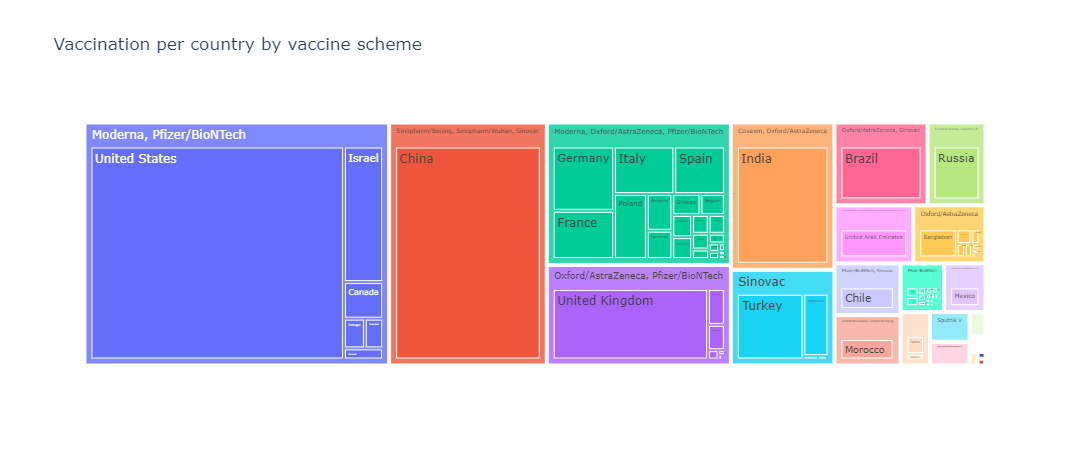

In [35]:
fig = px.treemap(vaccine_country, path=['Vaccines','Country'], values = 'Total vaccinations',
                title = 'Vaccination per country by vaccine scheme')
fig.show()

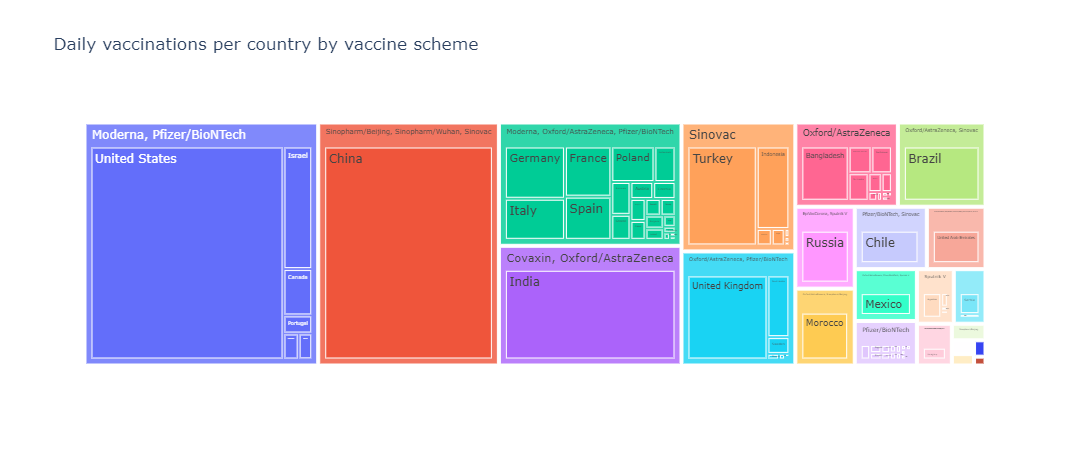

In [36]:
fig = px.treemap(vaccine_country, path=['Vaccines','Country'], values = 'Daily vaccinations',
                title = 'Daily vaccinations per country by vaccine scheme')
fig.show()

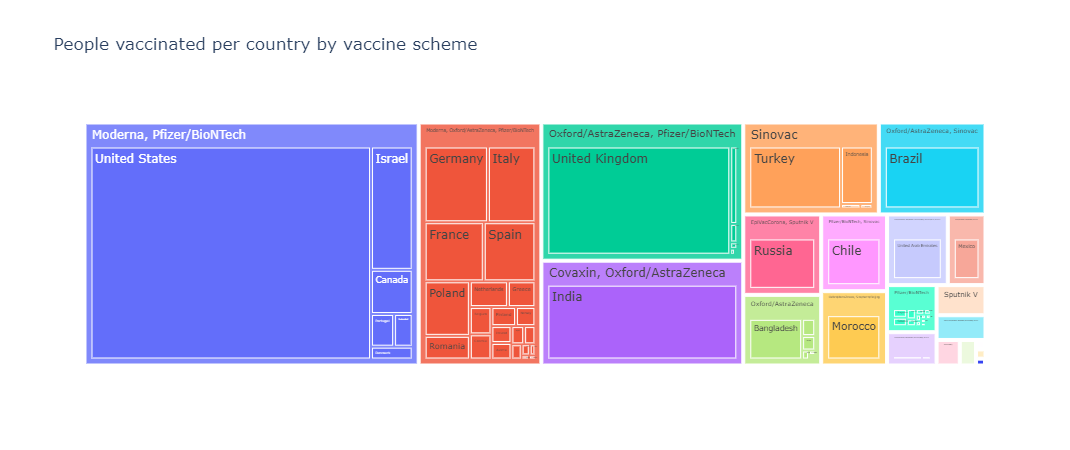

In [37]:
fig = px.treemap(vaccine_country, path = ['Vaccines', 'Country'], values = 'People vaccinated',
                title="People vaccinated per country by vaccine scheme")
fig.show()

We can now easily explore each country

# How many people are vaccinated / total and as % from population

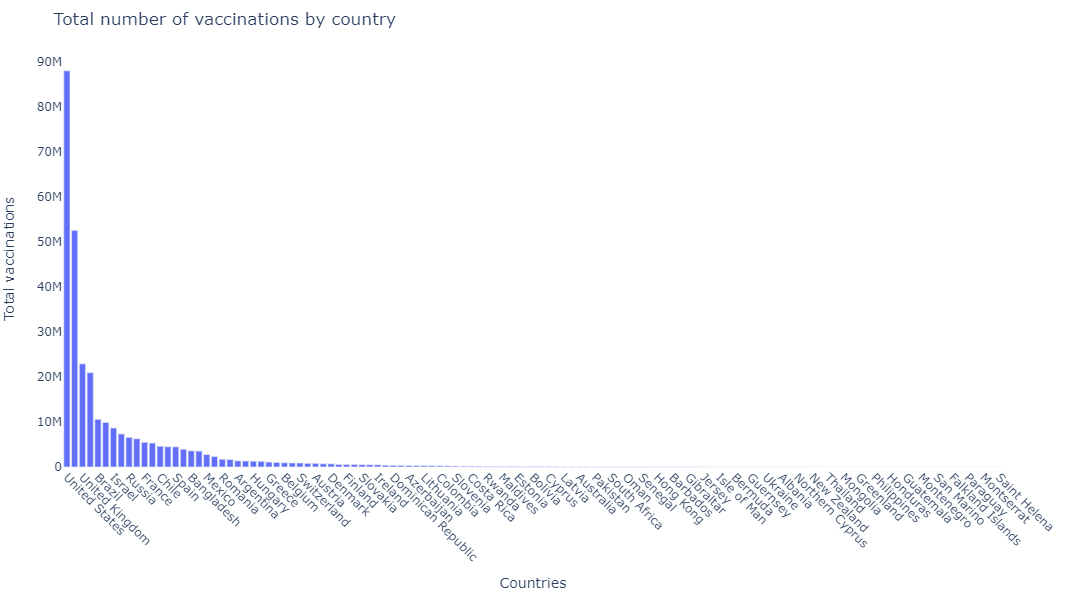

In [38]:
sorted_vaccine_country = vaccine_country.sort_values('Total vaccinations', ascending=False)
trace = go.Bar(x=sorted_vaccine_country['Country'],
               y = sorted_vaccine_country['Total vaccinations'],
               name = 'Total number of vaccinations by country',
               text = sorted_vaccine_country['Country'],
               )

data = [trace]
layout = dict(title = 'Total number of vaccinations by country', xaxis = dict(tickangle=45,
                                                              showticklabels=True,
                                                              title = 'Countries'),
             yaxis = dict(title = 'Total vaccinations'),
             plot_bgcolor='rgba(0,0,0,0)',
             height = 600,
             margin=dict(l=60, r=60, t=50, b=50)            
             )
fig = go.Figure(data = data,layout = layout
              )
iplot(fig)

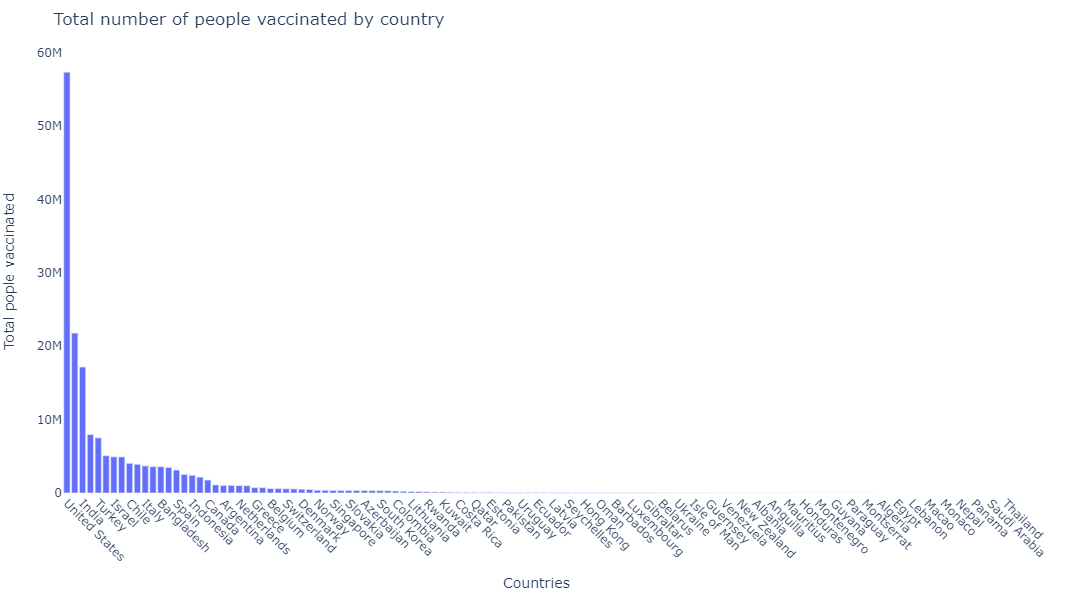

In [39]:
sorted_vaccine_country = vaccine_country.sort_values('People vaccinated', ascending=False)
trace = go.Bar(x=sorted_vaccine_country['Country'],
               y = sorted_vaccine_country['People vaccinated'],
               name = 'Total number of people vaccinated by country',
               text = sorted_vaccine_country['Country'],
               )

data = [trace]
layout = dict(title = 'Total number of people vaccinated by country', xaxis = dict(tickangle=45,
                                                              showticklabels=True,
                                                              title = 'Countries'),
             yaxis = dict(title = 'Total pople vaccinated'),
             plot_bgcolor='rgba(0,0,0,0)',
             height = 600,
             margin=dict(l=60, r=60, t=50, b=50)            
             )
fig = go.Figure(data = data,layout = layout
              )
iplot(fig)

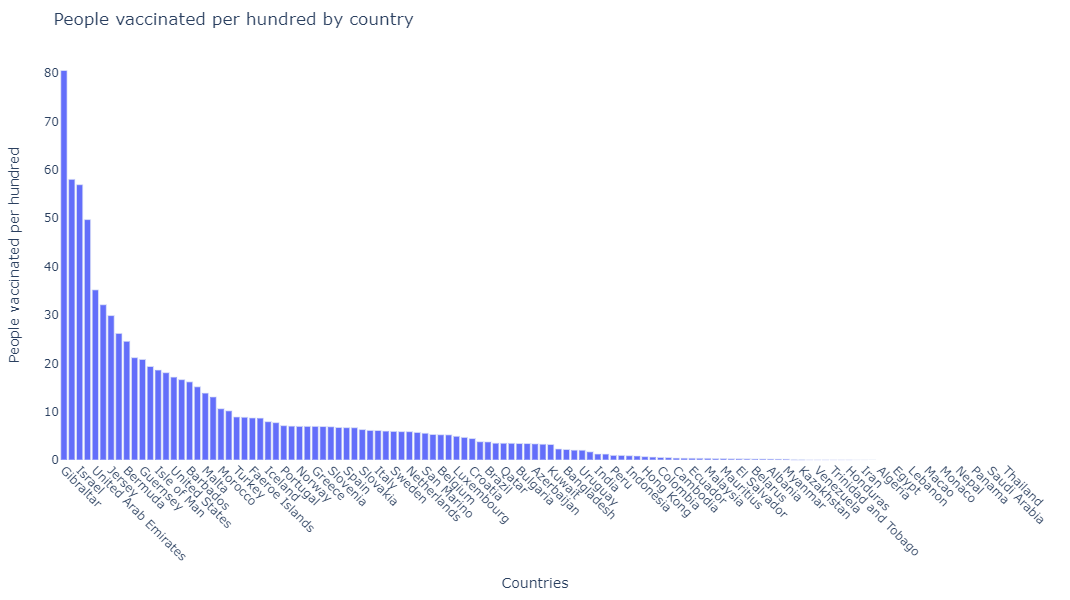

In [40]:
sorted_vaccine_country = vaccine_country.sort_values('People vaccinated per hundred', ascending=False)
trace = go.Bar(x=sorted_vaccine_country['Country'],
               y = sorted_vaccine_country['People vaccinated per hundred'],
               name = 'People vaccinated per hundred by country',
               text = sorted_vaccine_country['Country'],
               )

data = [trace]
layout = dict(title = 'People vaccinated per hundred by country', xaxis = dict(tickangle=45,
                                                              showticklabels=True,
                                                              title = 'Countries'),
             yaxis = dict(title = 'People vaccinated per hundred'),
             plot_bgcolor='rgba(0,0,0,0)',
             height = 600,
             margin=dict(l=60, r=60, t=50, b=50)            
             )
fig = go.Figure(data = data,layout = layout
              )
iplot(fig)

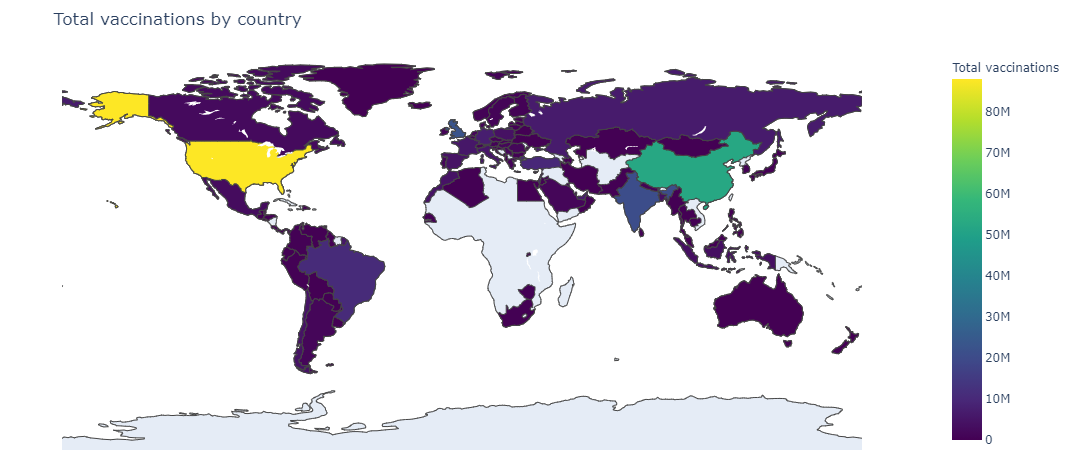

In [41]:
fig = px.choropleth(locations = vaccine_country['Country'], 
                   locationmode='country names',
                   color = vaccine_country['Total vaccinations'],
                   title = 'Total vaccinations by country',
                   width = 700,
                   height= 450,
                   color_continuous_scale="Viridis",
                   labels={'color':'Total vaccinations'} 
                   )
fig.update_layout({'legend_orientation':'h'})
fig.update_layout({'legend_title':'Vaccine scheme'},geo=dict(showframe=False))
fig.update_layout(margin=dict(l=0, r=0, t=50, b=0))
fig.show()

As we can see, USA is best country considering total vaccination

# Vaccination progress
Lets look on vaccination progress over time

In [42]:
country_vaccine_time = df[["country", "vaccines", "date", 'total_vaccinations', 
                                'total_vaccinations_per_hundred',  'people_vaccinated','people_vaccinated_per_hundred',
                               'daily_vaccinations','daily_vaccinations_per_million', 
                                'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred'
                               ]].dropna()
country_vaccine_time.columns = ["Country", "Vaccines", "Date", 'Total vaccinations', 'Percent', 'People vaccinated', 'People percent',
                               "Daily vaccinations", "Daily vaccinations per million", 
                                'People fully vaccinated', 'People fully vaccinated percent']
country_vaccine_time.head() #now we will work with dates as well

,Country,Vaccines,Date,Total vaccinations,Percent,People vaccinated,People percent,Daily vaccinations,Daily vaccinations per million,People fully vaccinated,People fully vaccinated percent
30,Albania,Pfizer/BioNTech,2021-02-09,1127.0,0.04,689.0,0.02,82.0,28.0,438.0,0.02
38,Albania,Pfizer/BioNTech,2021-02-17,1701.0,0.06,1090.0,0.04,72.0,25.0,611.0,0.02
39,Albania,Pfizer/BioNTech,2021-02-18,3049.0,0.11,2438.0,0.08,254.0,88.0,611.0,0.02
43,Albania,Pfizer/BioNTech,2021-02-22,6728.0,0.23,6073.0,0.21,739.0,257.0,655.0,0.02
153,Argentina,Sputnik V,2021-01-20,247933.0,0.55,243539.0,0.54,11586.0,256.0,4394.0,0.01


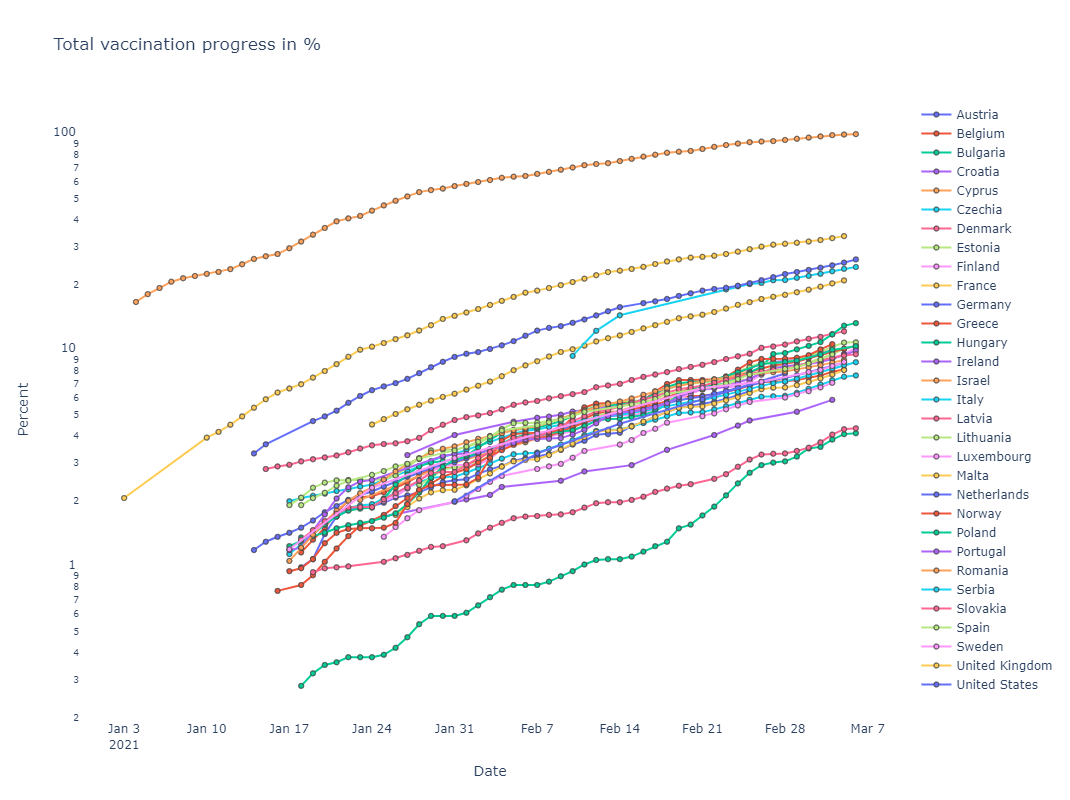

In [43]:
countries = ['Austria', 'Belgium', 'Bulgaria','Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany',
             'Greece', 'Hungary', 'Ireland', 'Israel', 'Italy', 'Latvia','Lithuania', 'Luxembourg', 'Malta',
             'Netherlands', 'Norway','Poland', 'Portugal', 'Romania', 'Serbia', 'Slovakia', 'Spain', 'Sweden',
             'United Kingdom', 'United States', 'China']

data = []
for country in countries:
    df_country = country_vaccine_time.loc[country_vaccine_time['Country']==country]
    trace = go.Scatter(x=df_country['Date'],
                       y=df_country['Percent'],
                       text = df_country['Country'],
                       name = country,
                       mode = "markers+lines",
                       marker_line_width = 1,
                       marker_size = 5,
                       marker_symbol = 'circle')
    data.append(trace)

layout = dict(title = 'Total vaccination progress in %', yaxis = dict(title='Percent', type='log'),
             xaxis = dict(title = 'Date'),
             plot_bgcolor = 'rgba(0,0,0,0)',
             hovermode = 'x',
             height = 800)
fig = dict(data=data, layout=layout)
iplot(fig)

As we can see Israel has best progress in vaccination

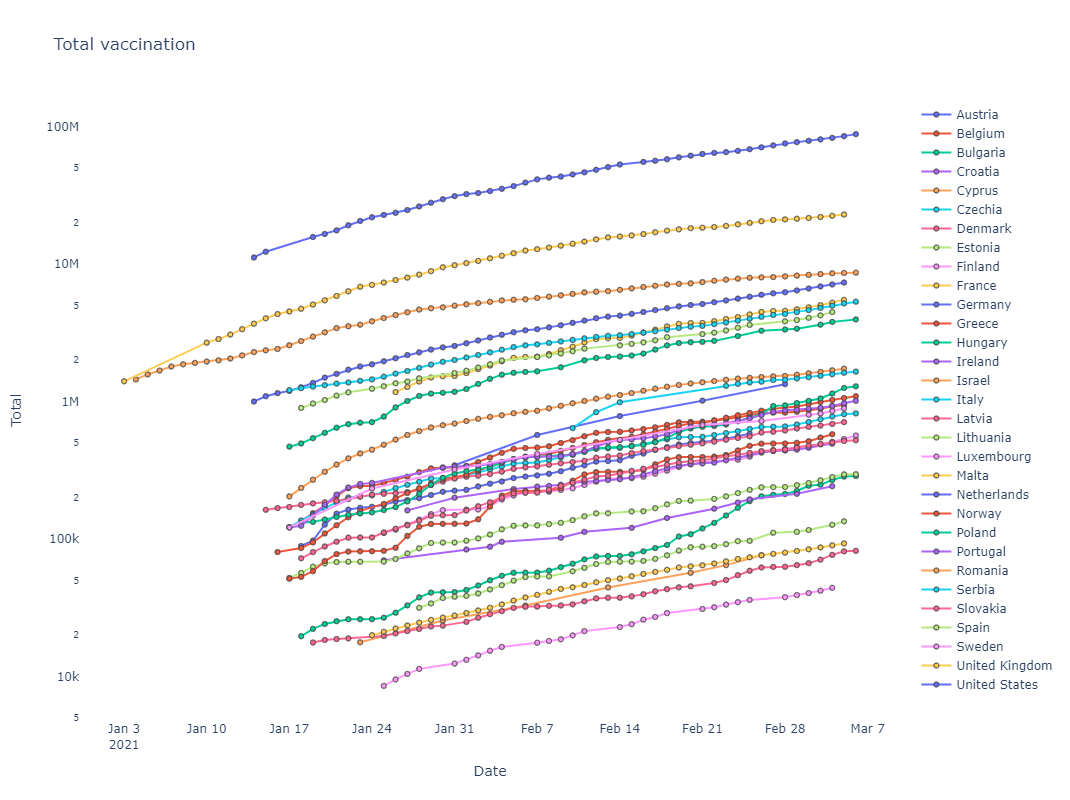

In [44]:
data = []
for country in countries:
    df_country = country_vaccine_time.loc[country_vaccine_time['Country']==country]
    trace = go.Scatter(x=df_country['Date'],
                       y=df_country['Total vaccinations'],
                       text = df_country['Country'],
                       name = country,
                       mode = "markers+lines",
                       marker_line_width = 1,
                       marker_size = 5,
                       marker_symbol = 'circle')
    data.append(trace)

layout = dict(title = 'Total vaccination', yaxis = dict(title='Total', type='log'),
             xaxis = dict(title = 'Date'),
             plot_bgcolor = 'rgba(0,0,0,0)',
             hovermode = 'x',
             height = 800)
fig = dict(data=data, layout=layout)
iplot(fig)

* United States has biggest total vaccinations 85 Mio as of ca 1. March.
* Croatia has lowest from our selected countries

# Now lets look at V4 Countries: Slovaka, Czechia, Hungary, Poland. Who is the best?

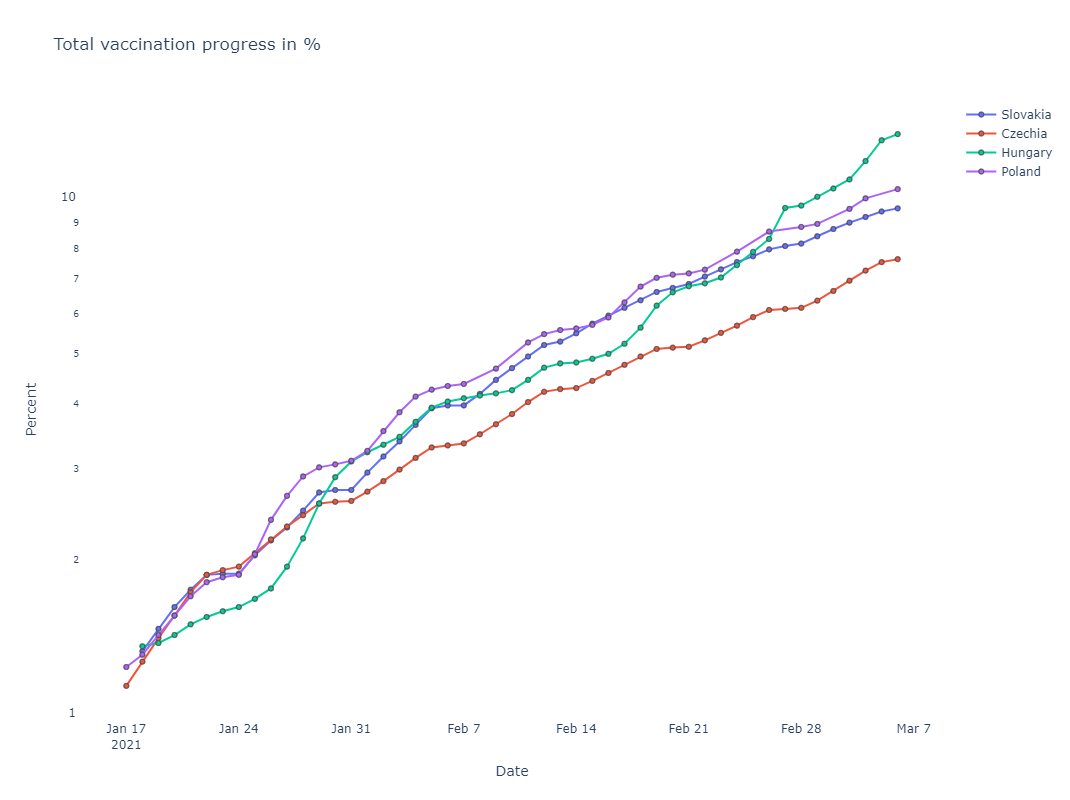

In [45]:
countries = ['Slovakia','Czechia','Hungary','Poland']


data = []
for country in countries:
    df_country = country_vaccine_time.loc[country_vaccine_time['Country']==country]
    trace = go.Scatter(x=df_country['Date'],
                       y=df_country['Percent'],
                       text = df_country['Country'],
                       name = country,
                       mode = "markers+lines",
                       marker_line_width = 1,
                       marker_size = 5,
                       marker_symbol = 'circle')
    data.append(trace)

layout = dict(title = 'Total vaccination progress in %', yaxis = dict(title='Percent', type='log'),
             xaxis = dict(title = 'Date'),
             plot_bgcolor = 'rgba(0,0,0,0)',
             hovermode = 'x',
             height = 800)
fig = dict(data=data, layout=layout)
iplot(fig)

* These countries has rougly same progress considering % of population vaccinated

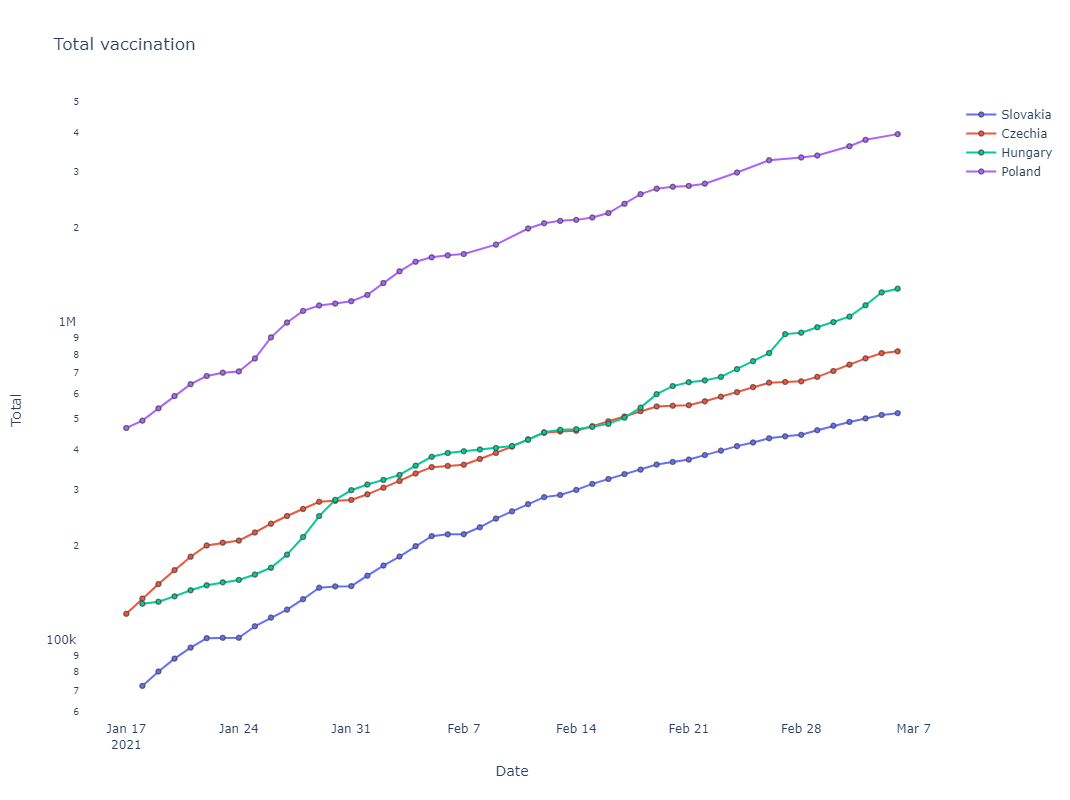

In [46]:
countries = ['Slovakia','Czechia','Hungary','Poland']
data = []
for country in countries:
    df_country = country_vaccine_time.loc[country_vaccine_time['Country']==country]
    trace = go.Scatter(x=df_country['Date'],
                       y=df_country['Total vaccinations'],
                       text = df_country['Country'],
                       name = country,
                       mode = "markers+lines",
                       marker_line_width = 1,
                       marker_size = 5,
                       marker_symbol = 'circle')
    data.append(trace)

layout = dict(title = 'Total vaccination', yaxis = dict(title='Total', type='log'),
             xaxis = dict(title = 'Date'),
             plot_bgcolor = 'rgba(0,0,0,0)',
             hovermode = 'x',
             height = 800)
fig = dict(data=data, layout=layout)
iplot(fig)

* Leader in total vaccination is Poland. However Poland is bigger country, therefore they have bigger total amount of vaccinations.

# THE END !!!